## Model Development - Deep Learning approach

In [1]:
import pandas as pd
import numpy as np 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("../data/combined_bbb_classification_no_descr.csv")
df

,name,smiles,BBB
0,sulphasalazine,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0
3,bbcpd11 (cimetidine analog) (y-g13),CCNC(=NCCSCc1ncccc1Br)NC#N,0
4,schembl614298,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0
...,...,...,...
9852,licostinel,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,1
9853,ademetionine(adenosyl-methionine),[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,1
9854,mesocarb,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,1
9855,tofisoline,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,1


In [3]:
desc = pd.read_csv("../data/rdkit_descriptors.csv")
desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,smiles
0,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,384.288,398.068491,142.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O
1,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,500.320,520.101247,190.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...
2,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,300.462,304.910439,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oc1c(I)cc(Cl)c2cccnc12
3,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,326.138,341.030979,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCNC(=NCCSCc1ncccc1Br)NC#N
4,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,434.251,461.168581,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,11.106041,11.106041,0.037685,-1.000936,0.466075,10.705882,276.035,273.011,274.950061,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
9853,10.698110,10.698110,0.210831,-1.284365,0.344970,27.703704,398.445,376.269,398.137239,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
9854,11.877182,11.877182,0.094708,-0.499803,0.685827,11.708333,322.368,304.224,322.142976,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
9855,8.783737,8.783737,0.616526,0.616526,0.588327,10.785714,382.460,356.252,382.189257,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [4]:
#dropping duplicates 
df = df.drop_duplicates(subset=['smiles'])
desc = desc.drop_duplicates(subset=['smiles'])

In [5]:
main_df = pd.merge(df, desc, on='smiles', how='inner')
main_df

,name,smiles,BBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,sulphasalazine,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,0,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,moxalactam,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,0,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,clioquinol,Oc1c(I)cc(Cl)c2cccnc12,0,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bbcpd11 (cimetidine analog) (y-g13),CCNC(=NCCSCc1ncccc1Br)NC#N,0,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,schembl614298,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,0,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,licostinel,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,1,11.106041,11.106041,0.037685,-1.000936,0.466075,10.705882,276.035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9743,ademetionine(adenosyl-methionine),[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,1,10.698110,10.698110,0.210831,-1.284365,0.344970,27.703704,398.445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9744,mesocarb,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,1,11.877182,11.877182,0.094708,-0.499803,0.685827,11.708333,322.368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9745,tofisoline,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,1,8.783737,8.783737,0.616526,0.616526,0.588327,10.785714,382.460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Check for duplicates in each dataframe
print(f"Duplicates in smiles_df: {desc.duplicated(subset=['smiles']).sum()}")
print(f"Duplicates in bbb_df: {df.duplicated(subset=['smiles']).sum()}")

Duplicates in smiles_df: 110
Duplicates in bbb_df: 110


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import SanitizeFlags
from rdkit.Chem import Draw

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

# Only use lightweight ML libraries (no TensorFlow/RDKit initially)
print("🚀 Ultra-lightweight BBB prediction pipeline")
print("Using scikit-learn only - no deep learning overhead")

class NotebookSafeBBBPredictor:
    """
    Notebook-safe BBB predictor using only lightweight ML
    """
    
    def __init__(self, df, smiles_col='SMILES', target_col='BBB', max_samples=500):
        """
        Initialize with strict memory limits
        """
        # Immediate memory management
        if len(df) > max_samples:
            self.df = df.sample(n=max_samples, random_state=42).copy()
            print(f"⚠️  Limited to {max_samples} samples for notebook safety")
        else:
            self.df = df.copy()
        
        self.smiles_col = smiles_col
        self.target_col = target_col
        self.max_samples = max_samples
        
        # Clean up immediately
        del df
        gc.collect()
        
        print(f"✅ Dataset: {len(self.df)} molecules")
        print(f"✅ BBB+: {self.df[target_col].sum()}, BBB-: {len(self.df) - self.df[target_col].sum()}")
    
    def prepare_features_safe(self):
        """
        Prepare features with maximum safety
        """
        print("📊 Preparing molecular descriptors...")
        
        # Get numeric columns only
        numeric_cols = []
        for col in self.df.columns:
            if col not in [self.smiles_col, self.target_col]:
                if pd.api.types.is_numeric_dtype(self.df[col]):
                    # Check for too many missing values
                    missing_pct = self.df[col].isnull().sum() / len(self.df)
                    if missing_pct < 0.5:  # Less than 50% missing
                        numeric_cols.append(col)
        
        if not numeric_cols:
            raise ValueError("No usable numeric descriptor columns found!")
        
        print(f"✅ Using {len(numeric_cols)} descriptor features")
        
        # Extract features with minimal memory usage
        X = self.df[numeric_cols].fillna(0).values.astype(np.float32)
        y = self.df[self.target_col].values.astype(np.int8)  # Use int8 for binary labels
        
        # Clip extreme values to prevent issues
        X = np.clip(X, -1e6, 1e6)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=42, stratify=y
        )
        
        # Scale features
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Store with minimal memory footprint
        self.X_train = X_train_scaled.astype(np.float32)
        self.X_test = X_test_scaled.astype(np.float32)  
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = numeric_cols
        
        # Cleanup
        del X, X_train, X_test, X_train_scaled, X_test_scaled
        gc.collect()
        
        print(f"✅ Features prepared: {self.X_train.shape}")
        
    def train_lightweight_models(self):
        """
        Train multiple lightweight models
        """
        print("🤖 Training lightweight ML models...")
        
        # Prepare data if needed
        if not hasattr(self, 'X_train'):
            self.prepare_features_safe()
        
        models = {}
        results = {}
        
        # 1. Logistic Regression (fastest)
        print("Training Logistic Regression...")
        try:
            lr = LogisticRegression(random_state=42, max_iter=500, n_jobs=1)
            lr.fit(self.X_train, self.y_train)
            models['Logistic_Regression'] = lr
            print("✅ Logistic Regression trained")
        except Exception as e:
            print(f"❌ Logistic Regression failed: {e}")
        
        # 2. Random Forest (good balance)
        print("Training Random Forest...")
        try:
            rf = RandomForestClassifier(
                n_estimators=50,  # Keep small
                max_depth=10,
                random_state=42,
                n_jobs=2  # Use 2 cores max
            )
            rf.fit(self.X_train, self.y_train)
            models['Random_Forest'] = rf
            print("✅ Random Forest trained")
        except Exception as e:
            print(f"❌ Random Forest failed: {e}")
        
        # 3. SVM (if small dataset)
        if len(self.X_train) < 1000:
            print("Training SVM...")
            try:
                svm = SVC(probability=True, random_state=42)
                svm.fit(self.X_train, self.y_train)
                models['SVM'] = svm
                print("✅ SVM trained")
            except Exception as e:
                print(f"❌ SVM failed: {e}")
        
        self.models = models
        
        # Evaluate all models
        for name, model in models.items():
            try:
                results[name] = self.evaluate_model(model, name)
            except Exception as e:
                print(f"❌ {name} evaluation failed: {e}")
        
        self.results = results
        return results
    
    def evaluate_model(self, model, model_name):
        """
        Evaluate a single model safely
        """
        # Get predictions
        y_pred_proba = model.predict_proba(self.X_test)[:, 1]
        y_pred = model.predict(self.X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        auc = roc_auc_score(self.y_test, y_pred_proba)
        
        print(f"\n📈 {model_name} Results:")
        print(f"   Accuracy: {accuracy:.3f}")
        print(f"   AUC-ROC:  {auc:.3f}")
        
        return {
            'accuracy': accuracy,
            'auc': auc,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
    
    def cross_validate_safe(self, cv_folds=3):
        """
        Safe cross-validation
        """
        if not hasattr(self, 'models'):
            print("❌ Train models first!")
            return
        
        print(f"🔄 {cv_folds}-fold cross-validation...")
        
        cv_results = {}
        
        for name, model in self.models.items():
            try:
                # Use all data for CV
                X_all = np.vstack([self.X_train, self.X_test])
                y_all = np.concatenate([self.y_train, self.y_test])
                
                # Cross-validate
                cv_scores = cross_val_score(
                    model, X_all, y_all, cv=cv_folds, scoring='roc_auc', n_jobs=1
                )
                
                cv_results[name] = {
                    'mean_auc': cv_scores.mean(),
                    'std_auc': cv_scores.std(),
                    'scores': cv_scores
                }
                
                print(f"   {name}: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
                
            except Exception as e:
                print(f"❌ {name} CV failed: {e}")
        
        return cv_results
    
    def get_feature_importance(self):
        """
        Get feature importance from tree-based models
        """
        if not hasattr(self, 'models'):
            print("❌ Train models first!")
            return
        
        importance_data = {}
        
        for name, model in self.models.items():
            if hasattr(model, 'feature_importances_'):
                # Get top 10 features
                importances = model.feature_importances_
                indices = np.argsort(importances)[::-1][:10]
                
                importance_data[name] = {
                    'features': [self.feature_names[i] for i in indices],
                    'scores': importances[indices]
                }
                
                print(f"\n🔝 Top features for {name}:")
                for i, (feat, score) in enumerate(zip(
                    importance_data[name]['features'],
                    importance_data[name]['scores']
                )):
                    print(f"   {i+1}. {feat}: {score:.3f}")
        
        return importance_data
    
    def plot_results_safe(self):
        """
        Safe plotting with minimal memory usage
        """
        if not hasattr(self, 'results'):
            print("❌ Train models first!")
            return
        
        # Simple bar plot of results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        models = list(self.results.keys())
        accuracies = [self.results[m]['accuracy'] for m in models]
        aucs = [self.results[m]['auc'] for m in models]
        
        # Accuracy plot
        ax1.bar(models, accuracies, alpha=0.7, color='skyblue')
        ax1.set_title('Model Accuracy Comparison')
        ax1.set_ylabel('Accuracy')
        ax1.set_ylim(0, 1)
        ax1.tick_params(axis='x', rotation=45)
        
        # Add values on bars
        for i, v in enumerate(accuracies):
            ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')
        
        # AUC plot
        ax2.bar(models, aucs, alpha=0.7, color='lightcoral')
        ax2.set_title('Model AUC-ROC Comparison')
        ax2.set_ylabel('AUC-ROC')
        ax2.set_ylim(0, 1)
        ax2.tick_params(axis='x', rotation=45)
        
        # Add values on bars
        for i, v in enumerate(aucs):
            ax2.text(i, v + 0.01, f'{v:.3f}', ha='center')
        
        plt.tight_layout()
        plt.show()
    
    def run_complete_pipeline(self):
        """
        Run the complete lightweight pipeline
        """
        print("🚀 Starting ultra-lightweight BBB prediction pipeline...\n")
        
        try:
            # Step 1: Prepare features
            self.prepare_features_safe()
            
            # Step 2: Train models
            results = self.train_lightweight_models()
            
            # Step 3: Cross-validate
            cv_results = self.cross_validate_safe()
            
            # Step 4: Feature importance
            self.get_feature_importance()
            
            # Step 5: Plot results
            self.plot_results_safe()
            
            print("\n✅ Pipeline completed successfully!")
            print("\n📊 Final Summary:")
            for name, result in results.items():
                print(f"   {name}: Accuracy={result['accuracy']:.3f}, AUC={result['auc']:.3f}")
            
            return True
            
        except Exception as e:
            print(f"❌ Pipeline failed: {e}")
            return False

# ULTRA-SAFE USAGE
def safe_bbb_prediction(df, max_samples=300):
    """
    Ultra-safe BBB prediction for notebooks
    """
    try:
        print("🔧 Initializing ultra-safe BBB predictor...")
        
        # Create predictor with strict limits
        predictor = NotebookSafeBBBPredictor(
            df,
            smiles_col='SMILES',  # Adjust as needed
            target_col='BBB',     # Adjust as needed  
            max_samples=max_samples
        )
        
        # Run pipeline
        success = predictor.run_complete_pipeline()
        
        if success:
            return predictor
        else:
            print("Try with even smaller max_samples (100-200)")
            return None
            
    except Exception as e:
        print(f"❌ Failed: {e}")
        print("\n🔧 Troubleshooting:")
        print("1. Check column names match your data")
        print("2. Ensure you have numeric descriptor columns")
        print("3. Try max_samples=100")
        print("4. Restart notebook kernel if memory is full")
        return None

# MINIMAL USAGE EXAMPLE
"""
# Load your data
df = pd.read_csv('your_dataset.csv')

# Run ultra-safe prediction
predictor = safe_bbb_prediction(df, max_samples=200)

if predictor:
    print("Success! Models trained without crashing.")
"""

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
🚀 Ultra-lightweight BBB prediction pipeline
Using scikit-learn only - no deep learning overhead


'\n# Load your data\ndf = pd.read_csv(\'your_dataset.csv\')\n\n# Run ultra-safe prediction\npredictor = safe_bbb_prediction(df, max_samples=200)\n\nif predictor:\n    print("Success! Models trained without crashing.")\n'

🔧 Initializing ultra-safe BBB predictor...
⚠️  Limited to 200 samples for notebook safety
✅ Dataset: 200 molecules
✅ BBB+: 125, BBB-: 75
🚀 Starting ultra-lightweight BBB prediction pipeline...

📊 Preparing molecular descriptors...
✅ Using 217 descriptor features
✅ Features prepared: (150, 217)
🤖 Training lightweight ML models...
Training Logistic Regression...
✅ Logistic Regression trained
Training Random Forest...
✅ Random Forest trained
Training SVM...
✅ SVM trained

📈 Logistic_Regression Results:
   Accuracy: 0.780
   AUC-ROC:  0.861

📈 Random_Forest Results:
   Accuracy: 0.840
   AUC-ROC:  0.891

📈 SVM Results:
   Accuracy: 0.780
   AUC-ROC:  0.881
🔄 3-fold cross-validation...
   Logistic_Regression: 0.870 ± 0.013
   Random_Forest: 0.890 ± 0.013
   SVM: 0.878 ± 0.023

🔝 Top features for Random_Forest:
   1. NumHeteroatoms: 0.055
   2. SMR_VSA1: 0.031
   3. fr_lactam: 0.027
   4. MolLogP: 0.022
   5. TPSA: 0.022
   6. NOCount: 0.019
   7. PEOE_VSA10: 0.018
   8. VSA_EState2: 0.018
 

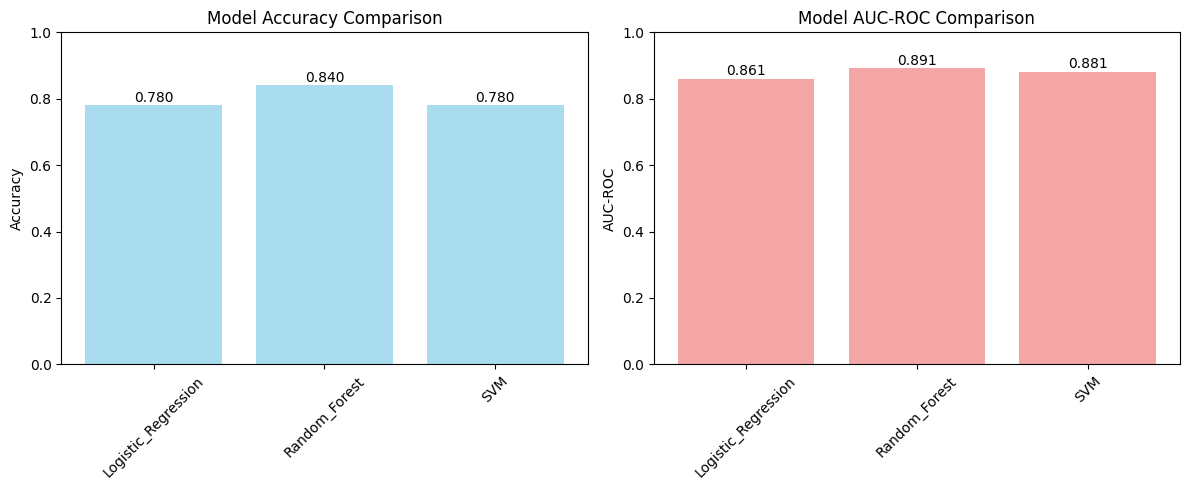


✅ Pipeline completed successfully!

📊 Final Summary:
   Logistic_Regression: Accuracy=0.780, AUC=0.861
   Random_Forest: Accuracy=0.840, AUC=0.891
   SVM: Accuracy=0.780, AUC=0.881
Success! Models trained without crashing.


In [6]:


# Run ultra-safe prediction
predictor = safe_bbb_prediction(main_df, max_samples=200)

if predictor:
    print("Success! Models trained without crashing.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')

# Import libraries with error handling
try:
    from rdkit import Chem
    from rdkit.Chem import Draw, rdDepictor
    from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
    RDKIT_AVAILABLE = True
except ImportError:
    print("RDKit not available. Install with: pip install rdkit")
    RDKIT_AVAILABLE = False

try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, optimizers, callbacks
    
    # Configure TensorFlow for memory efficiency
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(f"GPU configuration error: {e}")
    
    # Limit CPU threads to prevent overload
    tf.config.threading.set_intra_op_parallelism_threads(2)
    tf.config.threading.set_inter_op_parallelism_threads(2)
    
    TF_AVAILABLE = True
except ImportError:
    print("TensorFlow not available. Install with: pip install tensorflow")
    TF_AVAILABLE = False

class MemoryEfficientBBBPredictor:
    """
    Memory-efficient BBB permeability predictor
    """
    
    def __init__(self, df, smiles_col='SMILES', target_col='BBB', max_samples=None):
        """
        Initialize with memory management
        
        Args:
            df: DataFrame with molecular descriptors and BBB labels
            smiles_col: Column name containing SMILES strings  
            target_col: Column name containing BBB labels (0/1)
            max_samples: Limit dataset size for memory management
        """
        if max_samples and len(df) > max_samples:
            print(f"Limiting dataset to {max_samples} samples for memory efficiency")
            self.df = df.sample(n=max_samples, random_state=42).copy()
        else:
            self.df = df.copy()
            
        self.smiles_col = smiles_col
        self.target_col = target_col
        self.scaler = StandardScaler()
        
        print(f"Dataset loaded: {len(self.df)} molecules")
        print(f"BBB permeable: {self.df[target_col].sum()}, Non-permeable: {len(self.df) - self.df[target_col].sum()}")
        
        # Clean up
        gc.collect()
    
    def prepare_descriptors_safe(self):
        """
        Memory-safe descriptor preparation
        """
        print("Preparing molecular descriptors...")
        
        # Get feature columns (exclude SMILES and target)
        feature_cols = [col for col in self.df.columns 
                       if col not in [self.smiles_col, self.target_col]]
        
        # Check for non-numeric columns
        numeric_cols = []
        for col in feature_cols:
            if pd.api.types.is_numeric_dtype(self.df[col]):
                numeric_cols.append(col)
            else:
                print(f"Skipping non-numeric column: {col}")
        
        if not numeric_cols:
            raise ValueError("No numeric descriptor columns found!")
        
        print(f"Using {len(numeric_cols)} descriptor features")
        
        # Extract features with memory efficiency
        X = self.df[numeric_cols].values.astype(np.float32)  # Use float32 to save memory
        y = self.df[self.target_col].values.astype(np.int32)
        
        # Handle missing values efficiently
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train).astype(np.float32)
        X_test_scaled = self.scaler.transform(X_test).astype(np.float32)
        
        # Store results
        self.X_train_desc = X_train_scaled
        self.X_test_desc = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        
        # Clean up
        del X, X_train, X_test
        gc.collect()
        
        print(f"Descriptor features shape: {X_train_scaled.shape}")
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def generate_fingerprints(self, radius=2, n_bits=2048):
        """
        Generate Morgan fingerprints instead of images (much more memory efficient)
        """
        if not RDKIT_AVAILABLE:
            raise ImportError("RDKit required for fingerprint generation")
        
        print("Generating molecular fingerprints...")
        
        def smiles_to_fingerprint(smiles):
            """Convert SMILES to Morgan fingerprint"""
            try:
                mol = Chem.MolFromSmiles(smiles)
                if mol is None:
                    return np.zeros(n_bits, dtype=np.uint8)
                
                fp = GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=n_bits)
                return np.array(fp, dtype=np.uint8)
            except:
                return np.zeros(n_bits, dtype=np.uint8)
        
        # Process in batches to avoid memory issues
        batch_size = 100
        fingerprints = []
        
        for i in range(0, len(self.df), batch_size):
            batch_smiles = self.df[self.smiles_col].iloc[i:i+batch_size]
            batch_fps = [smiles_to_fingerprint(smiles) for smiles in batch_smiles]
            fingerprints.extend(batch_fps)
            
            if (i // batch_size + 1) % 10 == 0:
                print(f"Processed {i + len(batch_smiles)} molecules...")
                gc.collect()
        
        X_fp = np.array(fingerprints, dtype=np.float32)
        y_fp = self.df[self.target_col].values
        
        # Split data
        X_train_fp, X_test_fp, y_train_fp, y_test_fp = train_test_split(
            X_fp, y_fp, test_size=0.2, random_state=42, stratify=y_fp
        )
        
        self.X_train_fp = X_train_fp
        self.X_test_fp = X_test_fp
        self.y_train_fp = y_train_fp
        self.y_test_fp = y_test_fp
        
        # Clean up
        del X_fp, fingerprints
        gc.collect()
        
        print(f"Fingerprint features shape: {X_train_fp.shape}")
        return X_train_fp, X_test_fp, y_train_fp, y_test_fp
    
    def build_simple_mlp(self, input_dim):
        """
        Build a simpler, memory-efficient MLP model
        """
        if not TF_AVAILABLE:
            raise ImportError("TensorFlow required for MLP model")
        
        model = models.Sequential([
            layers.Dense(128, activation='relu', input_shape=(input_dim,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.2),
            
            layers.Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def build_simple_cnn(self, input_dim):
        """
        Build a simple 1D CNN for fingerprints (treats fingerprints as 1D sequences)
        """
        if not TF_AVAILABLE:
            raise ImportError("TensorFlow required for CNN model")
        
        # Reshape fingerprint for 1D CNN
        model = models.Sequential([
            layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            
            layers.Conv1D(32, 3, activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2),
            
            layers.Conv1D(64, 3, activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2),
            
            layers.GlobalAveragePooling1D(),
            
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.3),
            
            layers.Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def train_model_safe(self, model, X_train, y_train, model_name, 
                        epochs=50, batch_size=32, validation_split=0.2):
        """
        Safe model training with memory management
        """
        print(f"Training {model_name} Model...")
        
        # Callbacks for memory efficiency
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True
        )
        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
        )
        
        try:
            history = model.fit(
                X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_split=validation_split,
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )
            
            print(f"{model_name} training completed successfully!")
            return history
            
        except Exception as e:
            print(f"Training failed: {e}")
            print("Try reducing batch_size or model complexity")
            return None
    
    def evaluate_model_safe(self, model, X_test, y_test, model_name):
        """
        Safe model evaluation
        """
        try:
            print(f"\n=== {model_name} Model Evaluation ===")
            
            # Predict in batches to avoid memory issues
            predictions = []
            batch_size = 100
            
            for i in range(0, len(X_test), batch_size):
                batch = X_test[i:i+batch_size]
                pred_batch = model.predict(batch, verbose=0)
                predictions.extend(pred_batch.flatten())
            
            pred_probs = np.array(predictions)
            pred_binary = (pred_probs > 0.5).astype(int)
            
            accuracy = accuracy_score(y_test, pred_binary)
            auc = roc_auc_score(y_test, pred_probs)
            
            print(f"{model_name} Accuracy: {accuracy:.4f}")
            print(f"{model_name} AUC-ROC: {auc:.4f}")
            print(f"\n{model_name} Classification Report:")
            print(classification_report(y_test, pred_binary))
            
            return {
                'accuracy': accuracy,
                'auc': auc,
                'predictions': pred_probs,
                'predictions_binary': pred_binary
            }
            
        except Exception as e:
            print(f"Evaluation failed: {e}")
            return None
    
    def run_complete_pipeline(self, max_epochs=50):
        """
        Run the complete pipeline with error handling
        """
        results = {}
        
        try:
            # 1. Prepare descriptor data for MLP
            print("=== Step 1: Preparing Descriptors ===")
            self.prepare_descriptors_safe()
            
            # 2. Train MLP on descriptors
            print("\n=== Step 2: Training MLP on Descriptors ===")
            mlp_model = self.build_simple_mlp(self.X_train_desc.shape[1])
            
            print("MLP Model Architecture:")
            mlp_model.summary()
            
            history_mlp = self.train_model_safe(
                mlp_model, self.X_train_desc, self.y_train, 
                "MLP", epochs=max_epochs, batch_size=32
            )
            
            if history_mlp:
                results['MLP'] = self.evaluate_model_safe(
                    mlp_model, self.X_test_desc, self.y_test, "MLP"
                )
                self.mlp_model = mlp_model
            
        except Exception as e:
            print(f"MLP pipeline failed: {e}")
        
        try:
            # 3. Generate fingerprints
            print("\n=== Step 3: Generating Fingerprints ===")
            self.generate_fingerprints()
            
            # 4. Train CNN on fingerprints  
            print("\n=== Step 4: Training CNN on Fingerprints ===")
            cnn_model = self.build_simple_cnn(self.X_train_fp.shape[1])
            
            print("CNN Model Architecture:")
            cnn_model.summary()
            
            history_cnn = self.train_model_safe(
                cnn_model, self.X_train_fp, self.y_train_fp,
                "CNN", epochs=max_epochs, batch_size=16
            )
            
            if history_cnn:
                results['CNN'] = self.evaluate_model_safe(
                    cnn_model, self.X_test_fp, self.y_test_fp, "CNN"
                )
                self.cnn_model = cnn_model
                
        except Exception as e:
            print(f"CNN pipeline failed: {e}")
        
        # 5. Summary
        print("\n=== Final Results Summary ===")
        for model_name, result in results.items():
            if result:
                print(f"{model_name} - Accuracy: {result['accuracy']:.4f}, AUC: {result['auc']:.4f}")
        
        return results

# SAFE USAGE EXAMPLE
def run_safe_bbb_prediction(df, max_samples=1000):
    """
    Safe way to run BBB prediction with memory limits
    """
    try:
        # Initialize with memory limits
        predictor = MemoryEfficientBBBPredictor(
            df, 
            smiles_col='SMILES',  # Adjust column name as needed
            target_col='BBB',     # Adjust column name as needed
            max_samples=max_samples
        )
        
        # Run pipeline
        results = predictor.run_complete_pipeline(max_epochs=30)
        
        return predictor, results
        
    except Exception as e:
        print(f"Pipeline failed: {e}")
        print("\nTroubleshooting tips:")
        print("1. Reduce max_samples (try 500 or 200)")
        print("2. Check column names match your dataset")
        print("3. Ensure you have numeric descriptor columns")
        print("4. Install required packages: pip install rdkit tensorflow")
        
        return None, None

# HOW TO USE:
"""
# Load your dataframe
df = pd.read_csv('your_dataset.csv')

# Run safe prediction (start with small sample)
predictor, results = run_safe_bbb_prediction(df, max_samples=500)

if predictor and results:
    print("Success! Both models trained.")
else:
    print("Failed. Try with smaller max_samples or check data format.")
"""